*What was the best month for sales? How much     was earned that month?\

*What city sold the most product?\

*What time should we display advertisemens to maximize the likelihood of customer’s buying product?\

*What products are most often sold together?\

*What product sold the most? Why do you think it sold the most?\

### importing libraries

In [7]:
import pandas as pd
import numpy as np
import os

# Collect and Concat Data

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
files =[ file for file in os.listdir('/content/drive/MyDrive/Datasets/Sales_dataset')]
all_months_sales_data = pd.DataFrame()
path= '/content/drive/MyDrive/Datasets/Sales_dataset/'
for file in files:
  df =  pd.read_csv('/content/drive/MyDrive/Datasets/Sales_dataset/'+file)
  all_months_sales_data = pd.concat([all_months_sales_data,df])

all_months_sales_data.to_csv(path+'all_months_sales_data.csv',index=False) 


In [10]:
df2 = pd.read_csv('/content/drive/MyDrive/Datasets/Sales_dataset/all_months_sales_data.csv')
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Data Cleaning

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [12]:
df2.isnull().values.any()

True

### Find null values

In [13]:
df2.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

### Filter null values and remove them

In [14]:
nan_df = df2[df2.isna().any(axis=1)]
df2 = df2.dropna(how='all')
#nan_df

### Find Or data filtering data

In [15]:
df2 = df2[df2['Order Date'].str[0:2]!='Or']
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


### Adding total sales price column

In [16]:
import pandas as pd
df2['Quantity Ordered']=pd.to_numeric(df2['Quantity Ordered'])
df2['Price Each'] = pd.to_numeric(df2['Price Each'])
df2['Price Each']

0          11.95
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845     14.95
186846      3.84
186847    400.00
186848     11.99
186849     99.99
Name: Price Each, Length: 185950, dtype: float64

### Add month column

In [17]:
df2['Month'] = df2['Order Date'].str[0:2]
df2['Month'] = df2['Month'].astype('int32')
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [18]:
df2['Sales'] = df2['Quantity Ordered'] * df2 ['Price Each']
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### When most of the sales are occured?

In [19]:
results_sales = df2.groupby('Month').sum()
results_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


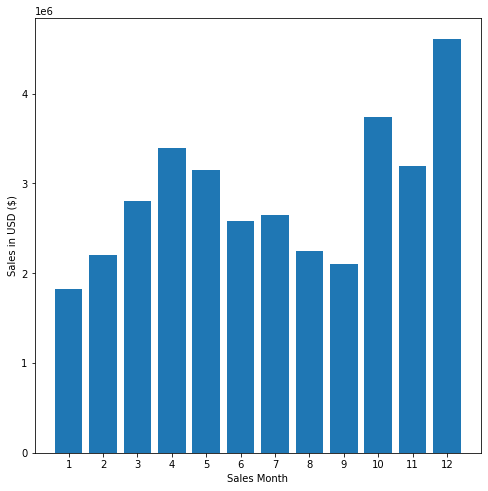

In [20]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.figure(figsize=(8,8))
plt.bar(months,results_sales['Sales'])
plt.xticks(months)
plt.xlabel('Sales Month')
plt.ylabel('Sales in USD ($)')
plt.show()

## What city sales most product

In [26]:
def getCity(address):
  return address.split(',')[1]

def getState(address):
  return address.split(',')[2].split(' ')[1]
    
df2['City'] = df2['Purchase Address'].apply(lambda x:f"{getCity(x)} ({getState(x)})" )
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [27]:
result_city = df2.groupby('City').sum()
result_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


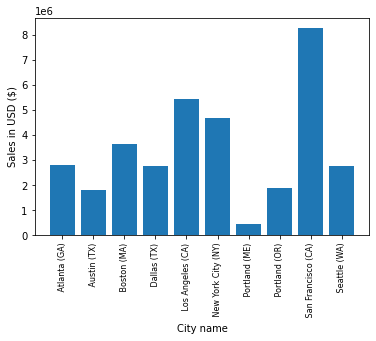

In [56]:
#plt.bar()
cities = [city for city ,df in df2.groupby(['City'])]
sales=result_city['Sales'].values
#cities
plt.bar(cities,result_city['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City name")
plt.show()

## What time should we display advertisments to maximize likehood of customer's buying product??

In [58]:
df2['Order Date']= pd.to_datetime(df2['Order Date'])
df2.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)


In [63]:
df2['Hour'] = df2['Order Date'].dt.hour
df2['Minute'] = df2['Order Date'].dt.minute
#df2.info()

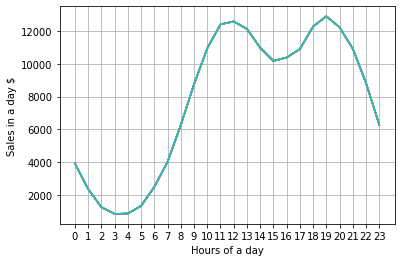

In [66]:
hours = [hour for hour ,df in df2.groupby('Hour')]
plt.plot(hours,df2.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours of a day')
plt.ylabel('Sales in a day $')
plt.show()


### What Products are most often sold togather???

In [72]:
df3 = df2[df2['Order ID'].duplicated(keep = False)]
df3['Grouped'] = df3.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df3 = df3[['Order ID','Grouped']].drop_duplicates()
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186710,319536,"Macbook Pro Laptop,Wired Headphones"
186731,319556,"Google Phone,Wired Headphones"
186760,319584,"iPhone,Wired Headphones"
186773,319596,"iPhone,Lightning Charging Cable"


In [84]:
from itertools import combinations
from collections import Counter
count=Counter()

for row in  df3['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
  print(key,value)
#  print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most???

['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'Apple Airpods Headphones', 'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone', 'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable', 'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones', 'iPhone']


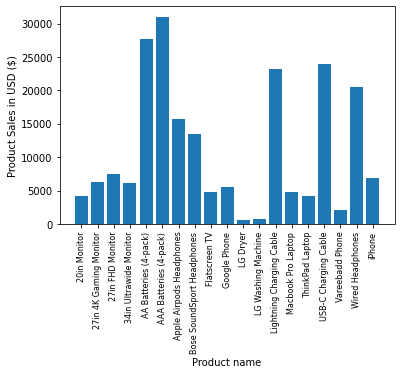

In [98]:
products_group=df2.groupby('Product')
#products_group
#products.head()
quantity_order = products_group.sum()['Quantity Ordered']
#plt.bar()
products = [product for product ,df in products_group]
print(products)
plt.bar(products,quantity_order)
plt.xticks(products,rotation='vertical',size=8)
plt.ylabel("Product Sales in USD ($)")
plt.xlabel("Product name")
plt.show()

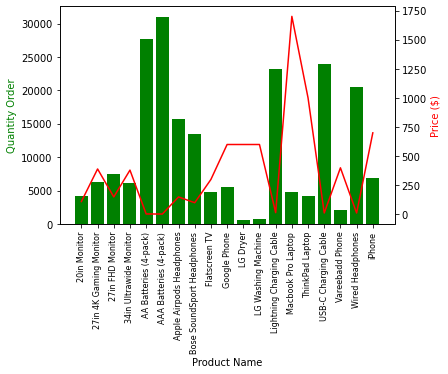

In [105]:
price = df2.groupby("Product").mean()['Price Each']
#price
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_order,color = 'g')
ax2.plot(products,price,'r-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Order',color='g')
ax2.set_ylabel('Price ($)',color='r')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()

# Data Cleaning and Data Engineering

# Data Visualization

# Data modelling

# Data Prediction and accuracy test